# Лена

Примените фильтр к изображению Лены

1. Скачайте изображение [Лены](http://optipng.sourceforge.net/pngtech/img/lena.png)
1. Найдите фильтр для выделения признака на изображении. В лекции показан пример фильтра Собеля. Использовать примеры с лекций нельзя. Начать поиск фильтра можно с [этой страницы](https://en.wikipedia.org/wiki/Feature_(computer_vision)#Extraction)
1. Реализуйте процедуру свёртки изображения с фильтром
1. Сверните Лену

In [1]:
import cv2
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(f'Opencv version: {cv2.__version__}')

Opencv version: 4.5.4


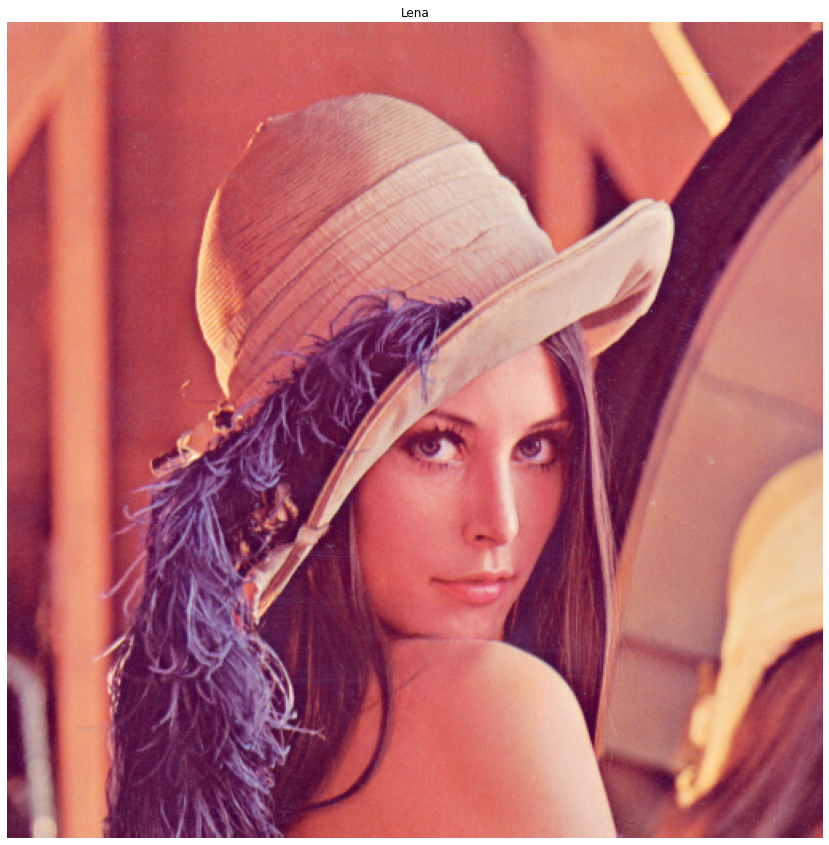

In [3]:
lena = cv2.cvtColor(cv2.imread('data/lena.png'), cv2.COLOR_BGR2RGB) 

plt.figure(figsize = (15, 15))
plt.title('Lena')
plt.imshow(lena)
plt.axis('off')
plt.show()

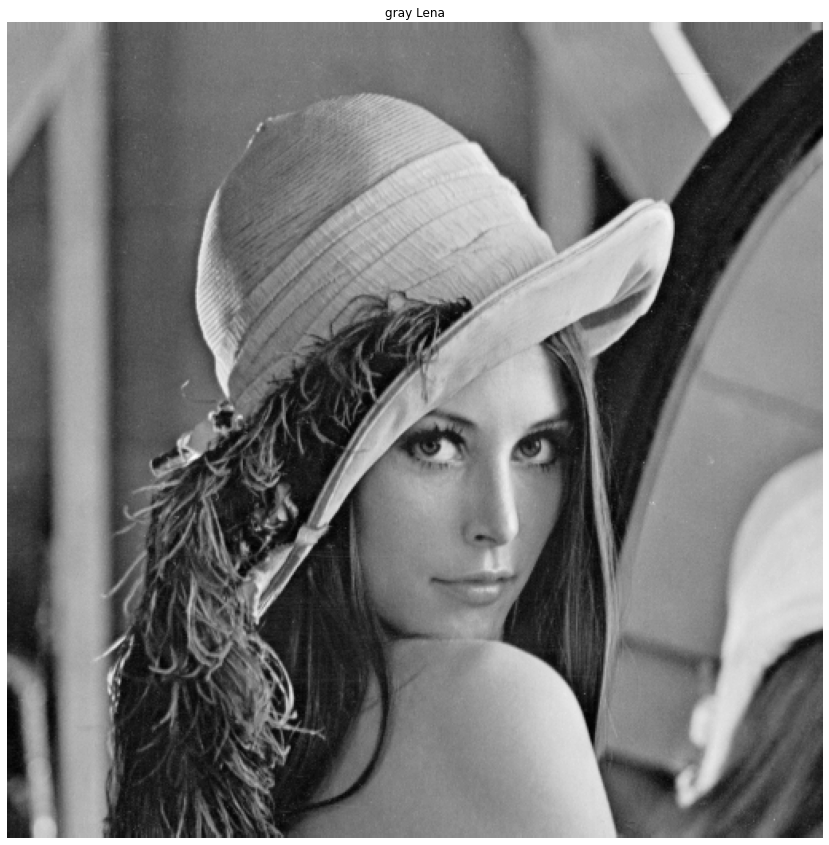

In [4]:
gray = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (15, 15))
plt.title('gray Lena')
plt.imshow(gray, cmap = 'gray')
plt.axis('off')
plt.show()

In [21]:
# Laplassian of Gaussian
# sigma = 1.4 
log1 = np.asarray(
   [[0, 1, 1, 2, 2, 2, 1, 1, 0],
    [1, 2, 4, 5, 5, 5, 4, 2, 1],
    [1, 4, 5, 3, 0, 3, 5, 4, 1],
    [2, 5, 3, -12, -24, -12, 3, 5, 2],
    [2, 5, 0, -24, -40, -24, 0, 5, 2],
    [2, 5, 3, -12, -24, -12, 3, 5, 2],
    [1, 4, 5, 3, 0, 3, 5, 4, 1],
    [1, 2, 4, 5, 5, 5, 4, 2, 1],
    [0, 1, 1, 2, 2, 2, 1, 1, 0]], dtype = "int8")

In [31]:
def LoG(sigma, x, y):
    laplace = -1 / (np.pi * sigma**4) * (1 - (x**2 + y**2) / (2 * sigma**2)) * \
                np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return laplace

def LoG_discrete(sigma, n):
    l = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            l[i,j] = LoG(sigma, (i - (n - 1) / 2), (j - (n - 1) / 2))
    return l

sigma = 1

l = np.round(LoG_discrete(sigma, 9) * (-40 / LoG(sigma,0,0)))
print (l)

log2 = np.array(l, dtype = "int8")

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   2.   1.   0.   0.   0.]
 [  0.   0.   2.   5.   5.   5.   2.   0.   0.]
 [  0.   1.   5.  -0. -12.  -0.   5.   1.   0.]
 [  0.   2.   5. -12. -40. -12.   5.   2.   0.]
 [  0.   1.   5.  -0. -12.  -0.   5.   1.   0.]
 [  0.   0.   2.   5.   5.   5.   2.   0.   0.]
 [  0.   0.   0.   1.   2.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]


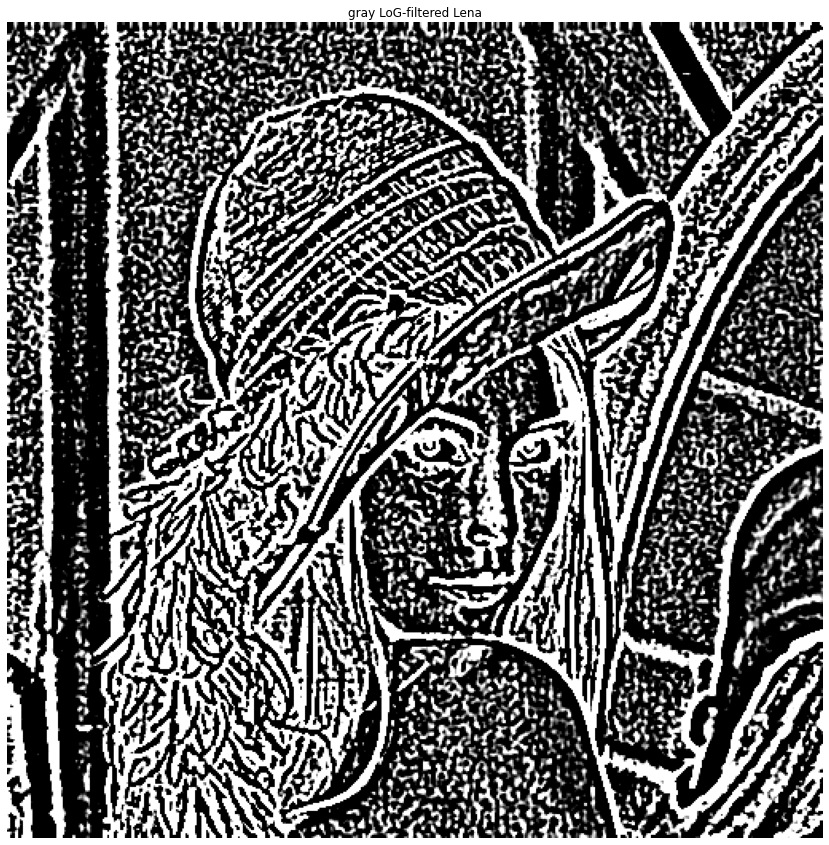

In [32]:
log_filtered = cv2.filter2D(gray, -1, log1)

plt.figure(figsize = (15, 15))
plt.title('gray LoG-filtered Lena')
plt.imshow(log_filtered, cmap = 'gray')
plt.axis('off')
plt.show()

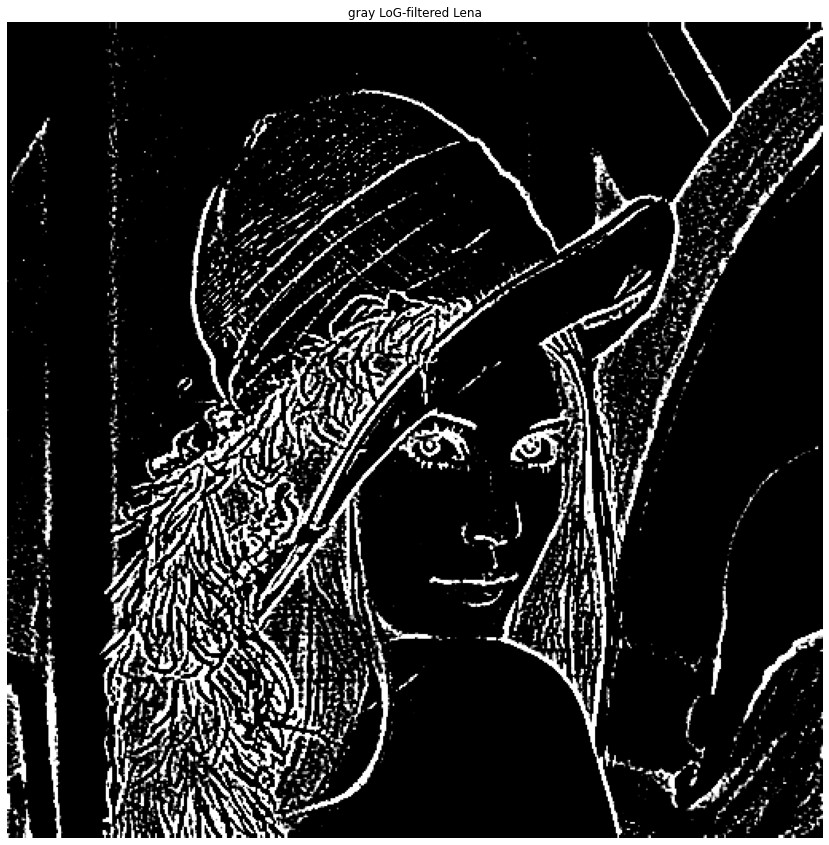

In [33]:
log_filtered = cv2.filter2D(gray, -1, log2)

plt.figure(figsize = (15, 15))
plt.title('gray LoG-filtered Lena')
plt.imshow(log_filtered, cmap = 'gray')
plt.axis('off')
plt.show()

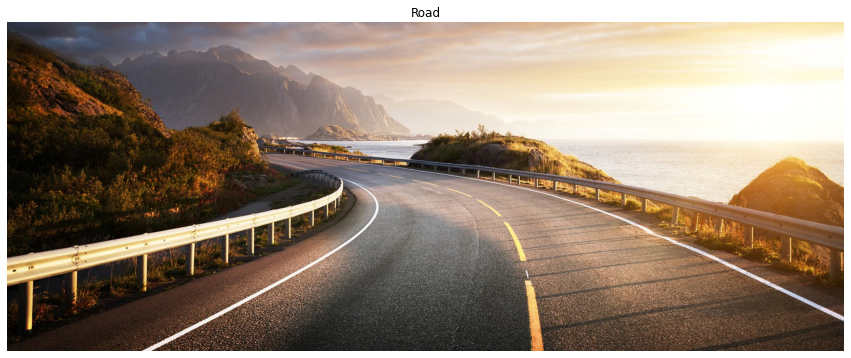

In [12]:
road = cv2.cvtColor(cv2.imread('data/road.png'), cv2.COLOR_BGR2RGB) 

plt.figure(figsize = (15, 15))
plt.title('Road')
plt.imshow(road)
plt.axis('off')
plt.show()

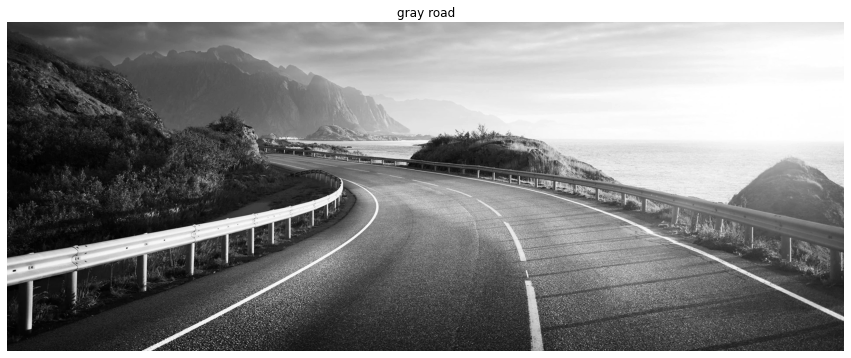

In [13]:
gray_road = cv2.cvtColor(road, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (15, 15))
plt.title('gray road')
plt.imshow(gray_road, cmap = 'gray')
plt.axis('off')
plt.show()

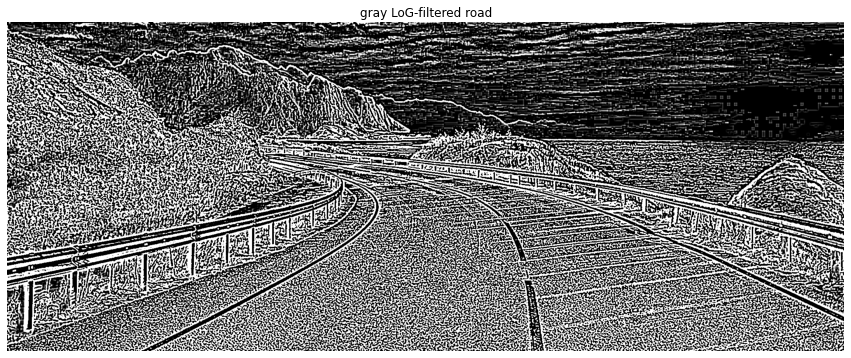

In [25]:
log_filtered_road = cv2.filter2D(gray_road, -1, log1)

plt.figure(figsize = (15, 15))
plt.title('gray LoG-filtered road')
plt.imshow(log_filtered_road, cmap = 'gray')
plt.axis('off')
plt.show()

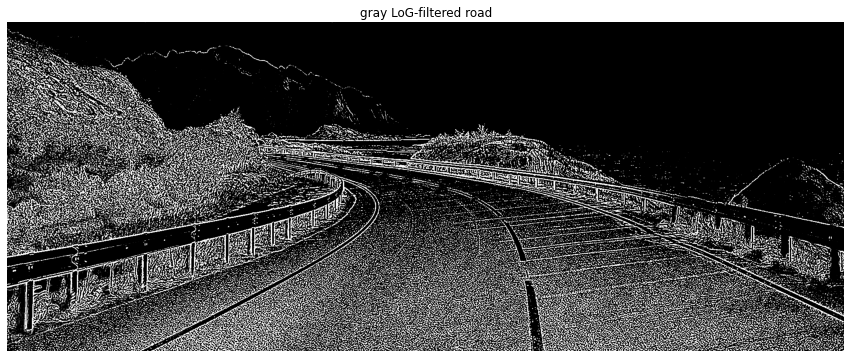

In [26]:
log_filtered_road = cv2.filter2D(gray_road, -1, log2)

plt.figure(figsize = (15, 15))
plt.title('gray LoG-filtered road')
plt.imshow(log_filtered_road, cmap = 'gray')
plt.axis('off')
plt.show()

In [8]:
dist = np.asarray(
   [[1.3693, 0.955, 1.3693],
    [0.955, 0, 0.955],
    [1.3693, 0.955, 1.3693]], dtype = "uint8")

dist2 = np.asarray(
   [[   1.4, 2.1969, 1, 2.1969,    1.4],
    [2.1969,    1.4, 1,    1.4, 2.1969],
    [     1,      1, 0,      1,      1],
    [2.1969,    1.4, 1,    1.4, 2.1969],
    [   1.4, 2.1969, 1, 2.1969,    1.4]], dtype = "uint8"
)

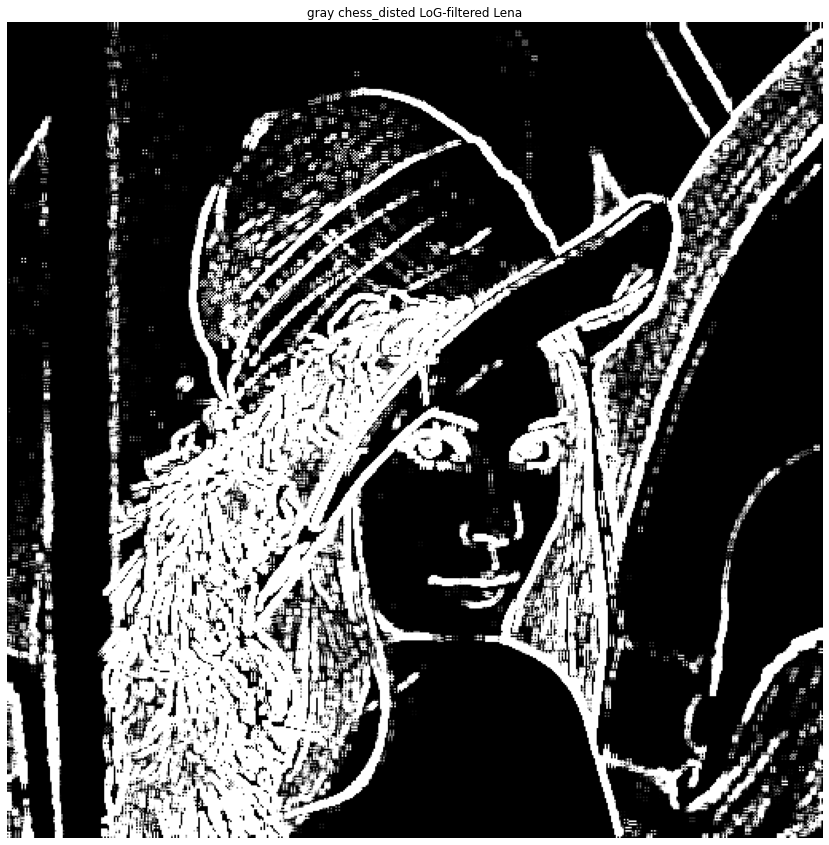

In [9]:
dist_filtered = cv2.filter2D(log_filtered, -1, dist)

plt.figure(figsize = (15, 15))
plt.title('gray chess_disted LoG-filtered Lena')
plt.imshow(dist_filtered, cmap = 'gray')
plt.axis('off')
plt.show()

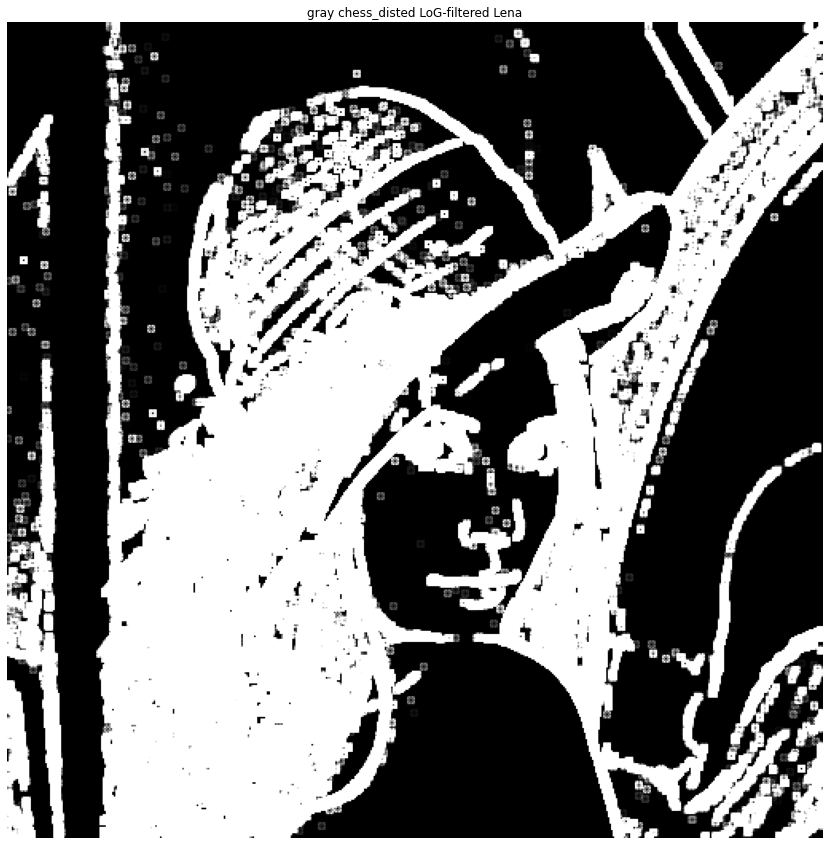

In [11]:
dist_filtered = cv2.filter2D(log_filtered, -1, dist2)

plt.figure(figsize = (15, 15))
plt.title('gray chess_disted LoG-filtered Lena')
plt.imshow(dist_filtered, cmap = 'gray')
plt.axis('off')
plt.show()

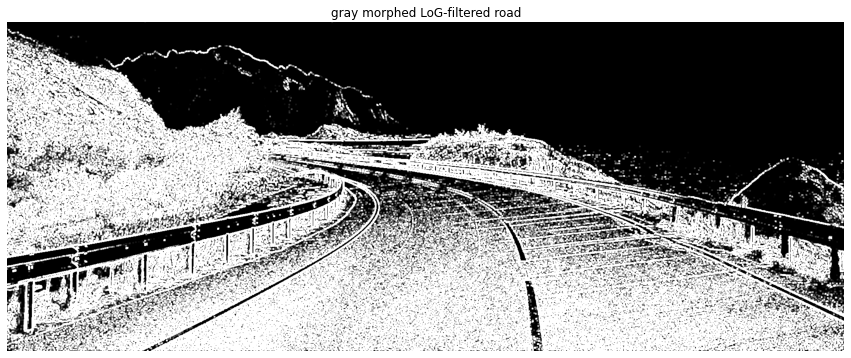

In [15]:
dist_filtered_road = cv2.filter2D(log_filtered_road, -1, dist)

plt.figure(figsize = (15, 15))
plt.title('gray morphed LoG-filtered road')
plt.imshow(dist_filtered_road, cmap = 'gray')
plt.axis('off')
plt.show()

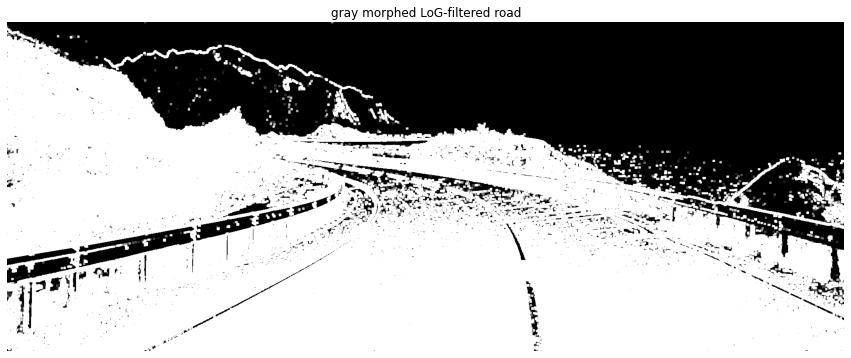

In [16]:
dist_filtered_road = cv2.filter2D(log_filtered_road, -1, dist2)

plt.figure(figsize = (15, 15))
plt.title('gray morphed LoG-filtered road')
plt.imshow(dist_filtered_road, cmap = 'gray')
plt.axis('off')
plt.show()